## Customer Retention

***

## Project Description

A few weeks after presenting your dashboard to the management, the Retention Manager from the telecom reaches out to you directly. He was impressed by your work and asked if you can put together a dashboard about customer retention.

In addition, to better understand the data, the telecom Retention Manager has scheduled a meeting with the engagement partner at PwC to cover these points:

    Customers in the telecom industry are hard-earned: we don’t want to lose them
    The retention department is here to get customers back in case of termination 
    Currently, we get in touch after they have terminated the contract, but this is reactionary: it would be better to know in advance who is at risk 
    We  have done customer analysis with Excel: it has always ended in a dead-end
    We would like to know more about our customers: visualised clearly so that it’s self-explanatory for our management

The Retentions Manager has provided some information, have a look through the resource section.

## Business Task

Your colleague, the engagement partner, asks you to do the following tasks:

    Define proper KPIs
    Create a dashboard for the retention manager reflecting the KPIs
    Write a short email to him (the engagement partner) explaining your findings, and include suggestions as to what needs to be changed

## KPIs

Visualize all features against the target variable Churn to look for obvious patterns.

## Assumptions

## Data Tasks

- 
- 
- 
- 
- 
-

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Churn-Dataset.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0,0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,0.52,0.42
std,0.37,24.56,30.09,1.28,1.25
min,0.00,0.00,18.25,0.00,0.00
25%,0.00,9.00,35.50,0.00,0.00
50%,0.00,29.00,70.35,0.00,0.00
75%,0.00,55.00,89.85,0.00,0.00
max,1.00,72.00,118.75,5.00,9.00


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets', 'Churn'], dtype='object')

In [7]:
df["TotalCharges"].describe(include='all')

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [8]:
df["TotalCharges"].str.contains(' ', na=False).sum()

11

### Treat Missing Values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(' ',np.nan)

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype("float", errors='ignore')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Groupby Function

In [14]:
df.groupby('Churn').sum()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
Churn,,,,,,
No,666,194387,316985.75,13193241.80,2747,782
Yes,476,33603,139130.85,2862926.90,885,2173


In [15]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
Churn,,,,,,
No,0.13,37.57,61.27,2555.34,0.53,0.15
Yes,0.25,17.98,74.44,1531.80,0.47,1.16


In [16]:
df.groupby(['Churn','gender']).mean()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  numAdminTickets  numTechTickets
Churn gender                                                                                      
No    Female           0.13   37.86           61.66       2594.05             0.53            0.15
      Male             0.13   37.29           60.88       2517.74             0.53            0.15
Yes   Female           0.26   17.00           74.81       1440.98             0.53            1.06
      Male             0.25   18.96           74.07       1623.49             0.42            1.27

## Data Visualization

### Univariate Data Exploration

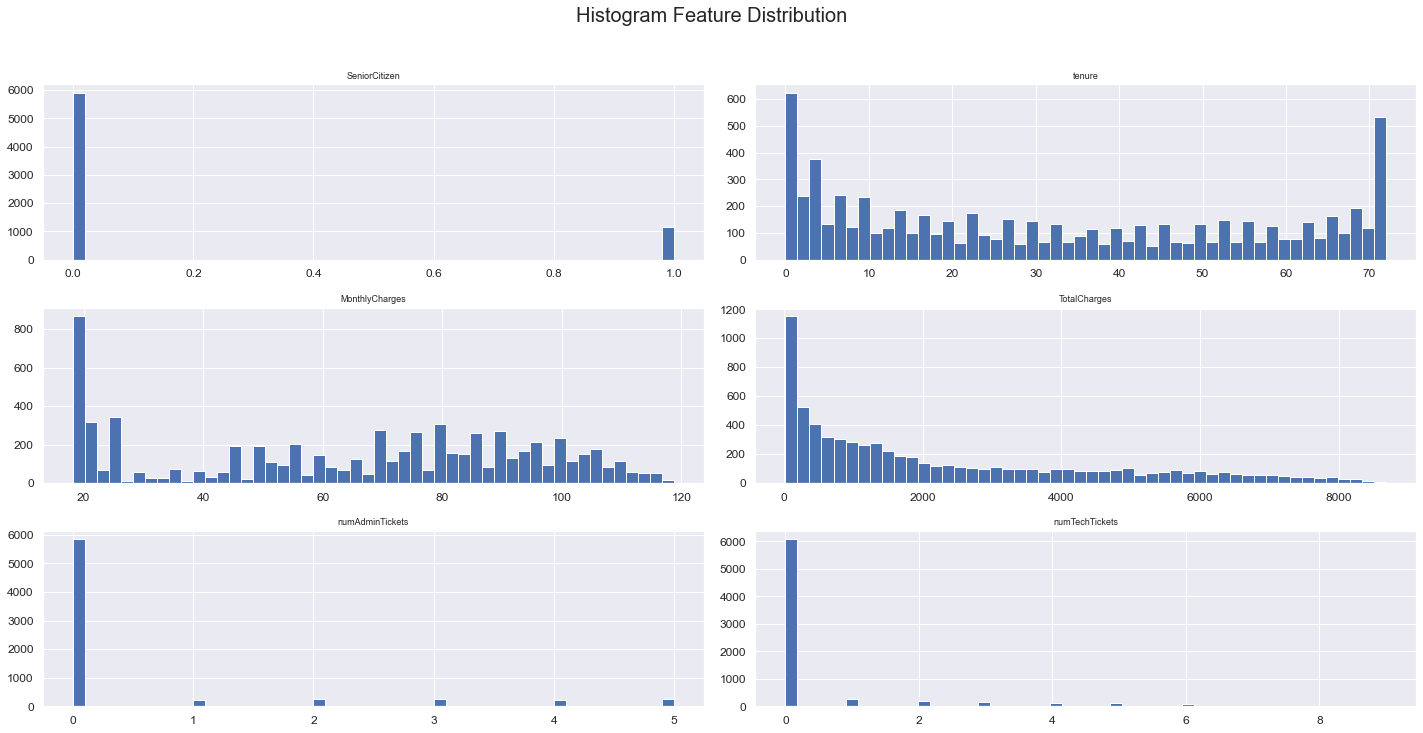

In [17]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

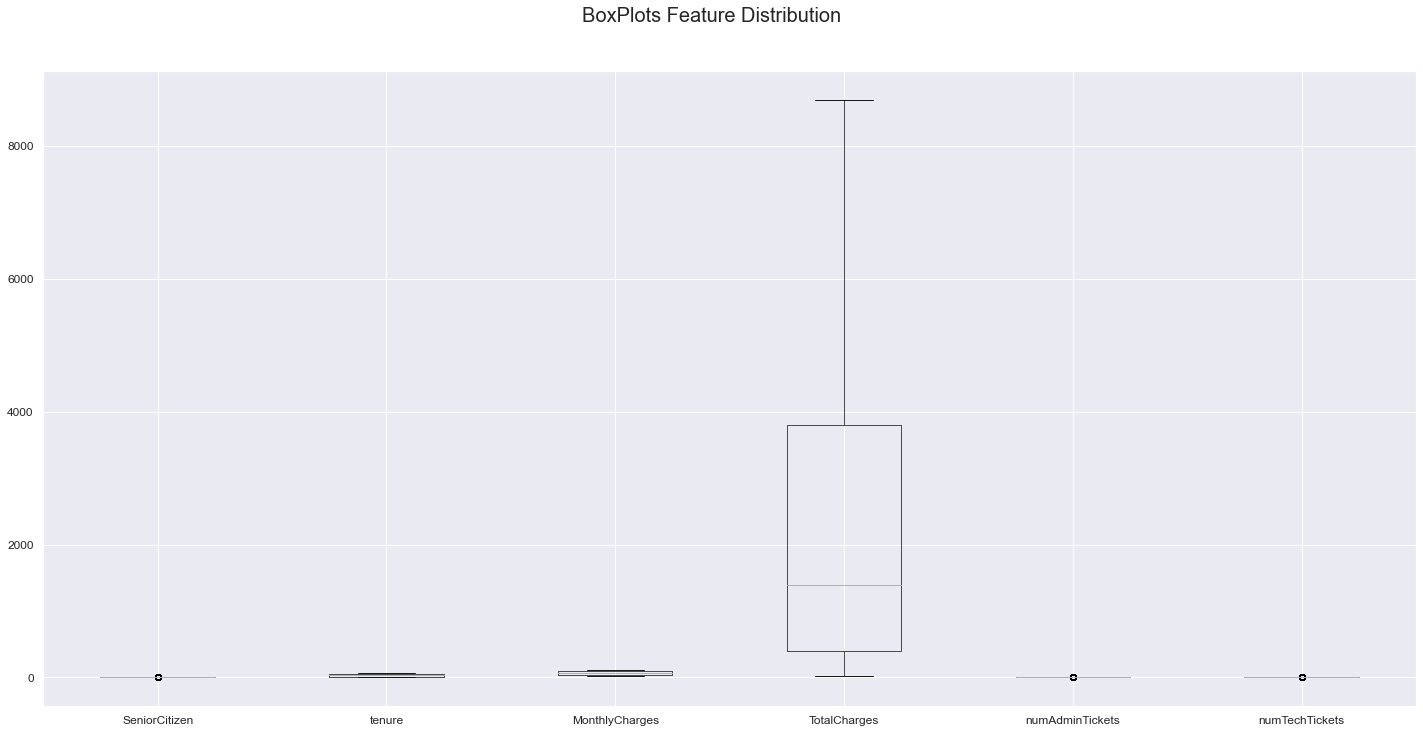

In [18]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

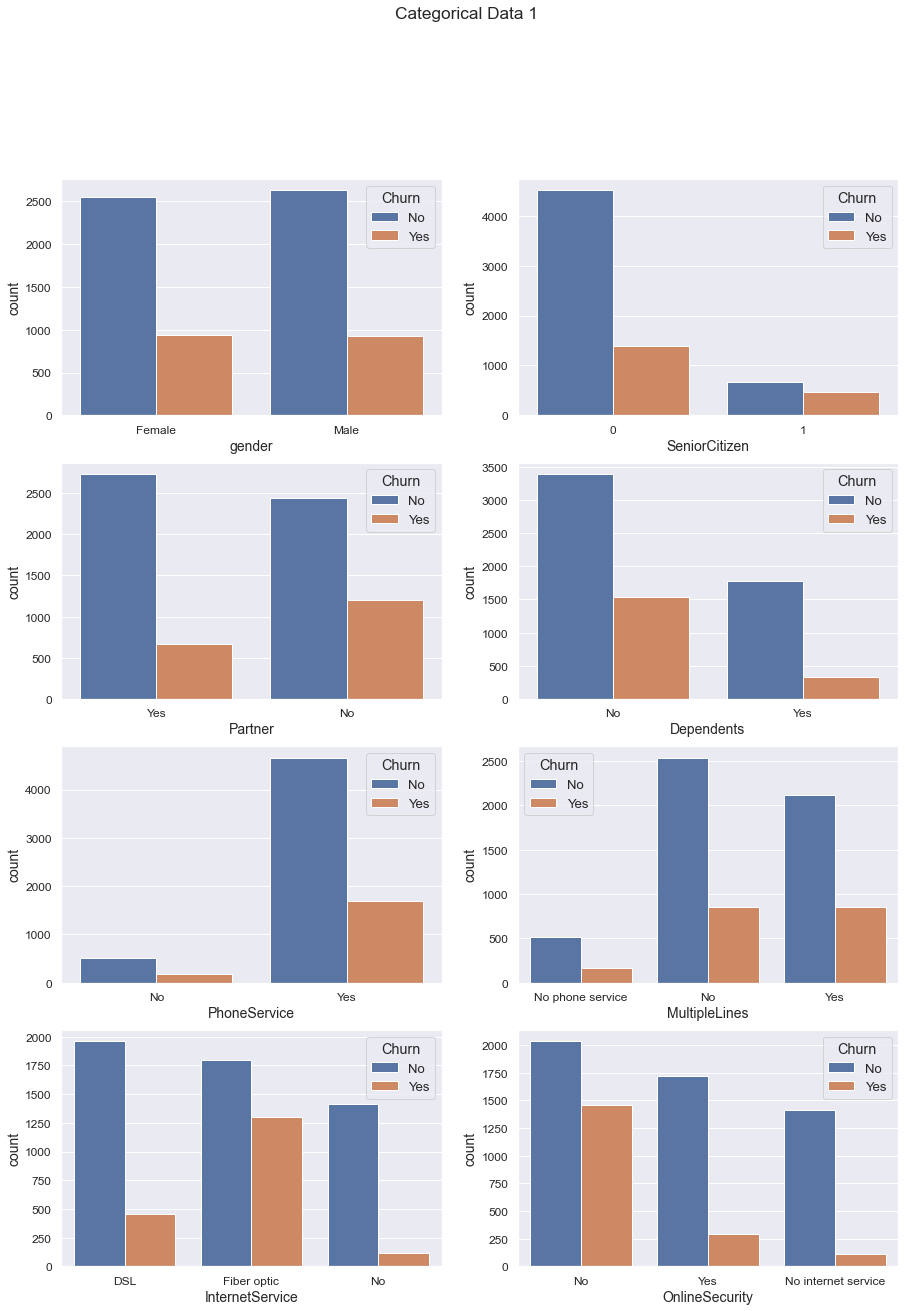

In [19]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4), (ax5 ,ax6), (ax7 ,ax8)) = plt.subplots(4,2, sharex=False, figsize=(15,20))
fig.suptitle('Categorical Data 1', y=1)

sns.countplot(x="gender", hue="Churn", data=df, ax=ax1)
#ax1.set_title('Title of the first chart')
#ax1.tick_params('x', labelrotation=45)

sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=ax2)
#ax2.set_title('Title of the second chart')
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="Partner", hue="Churn", data=df, ax=ax3)
#ax3.set_title('Title of the third chart')
#ax3.tick_params('x', labelrotation=45)

sns.countplot(x="Dependents", hue="Churn", data=df, ax=ax4)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="PhoneService", hue="Churn", data=df, ax=ax5)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=ax6)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="InternetService", hue="Churn", data=df, ax=ax7)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=ax8)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)


plt.show()

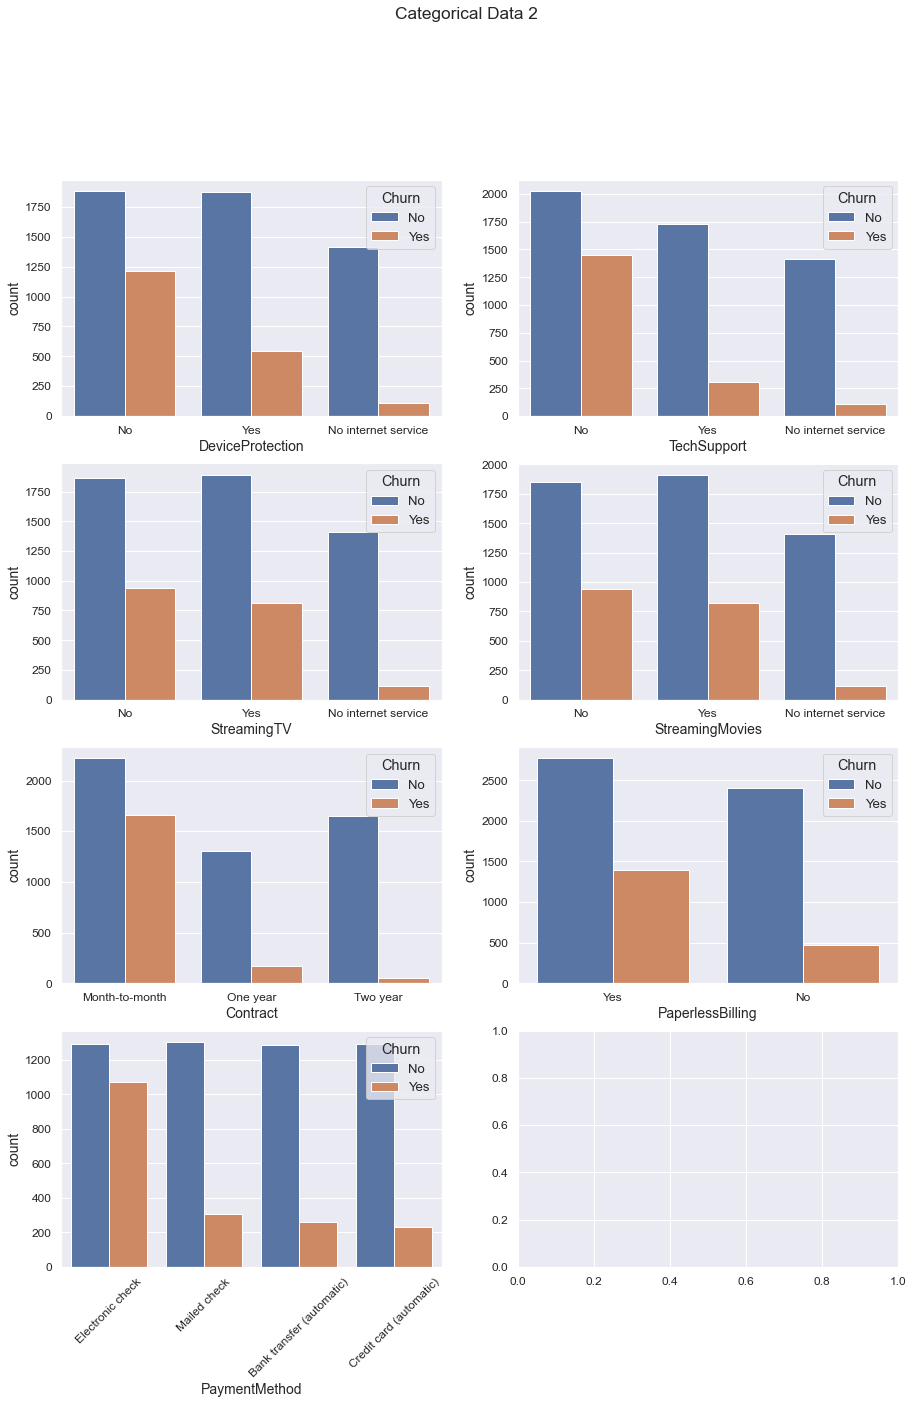

In [20]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4), (ax5 ,ax6), (ax7 ,ax8)) = plt.subplots(4,2, sharex=False, figsize=(15,20))
fig.suptitle('Categorical Data 2', y=1)

sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=ax1)
#ax1.set_title('Title of the first chart')
#ax1.tick_params('x', labelrotation=45)

sns.countplot(x="TechSupport", hue="Churn", data=df, ax=ax2)
#ax2.set_title('Title of the second chart')
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=ax3)
#ax3.set_title('Title of the third chart')
#ax3.tick_params('x', labelrotation=45)

sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=ax4)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="Contract", hue="Churn", data=df, ax=ax5)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="PaperlessBilling", hue="Churn", data=df, ax=ax6)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

sns.countplot(x="PaymentMethod", hue="Churn", data=df, ax=ax7)
#ax4.set_title('Title of the fourth chart')
ax7.tick_params('x', labelrotation=45)

#sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=ax8)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)


plt.show()

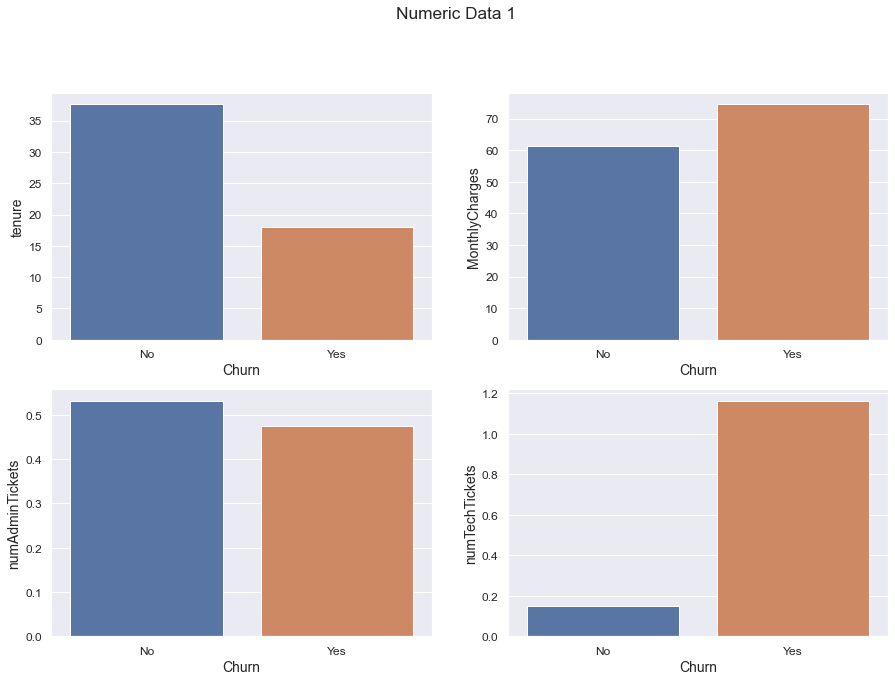

In [21]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2, sharex=False, figsize=(15,10))
fig.suptitle('Numeric Data 1', y=1)

sns.barplot(x="Churn", y="tenure", data=df, ax=ax1, ci=None)
#ax1.set_title('Title of the first chart')
#ax1.tick_params('x', labelrotation=45)

sns.barplot(x="Churn", y="MonthlyCharges", data=df, ax=ax2, ci=None)
#ax2.set_title('Title of the second chart')
#ax2.tick_params('x', labelrotation=45)

sns.barplot(x="Churn", y="numAdminTickets", data=df, ax=ax3, ci=None)
#ax3.set_title('Title of the third chart')
#ax3.tick_params('x', labelrotation=45)

sns.barplot(x="Churn", y="numTechTickets", data=df, ax=ax4, ci=None)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)

plt.show()

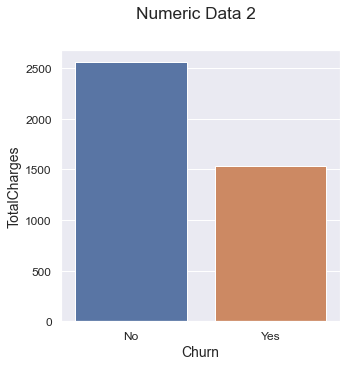

In [22]:
fig, ax = plt.subplots(1, sharex=False, figsize=(5,5))
fig.suptitle('Numeric Data 2', y=1)

sns.barplot(x="Churn", y="TotalCharges", data=df, ci=None)

plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

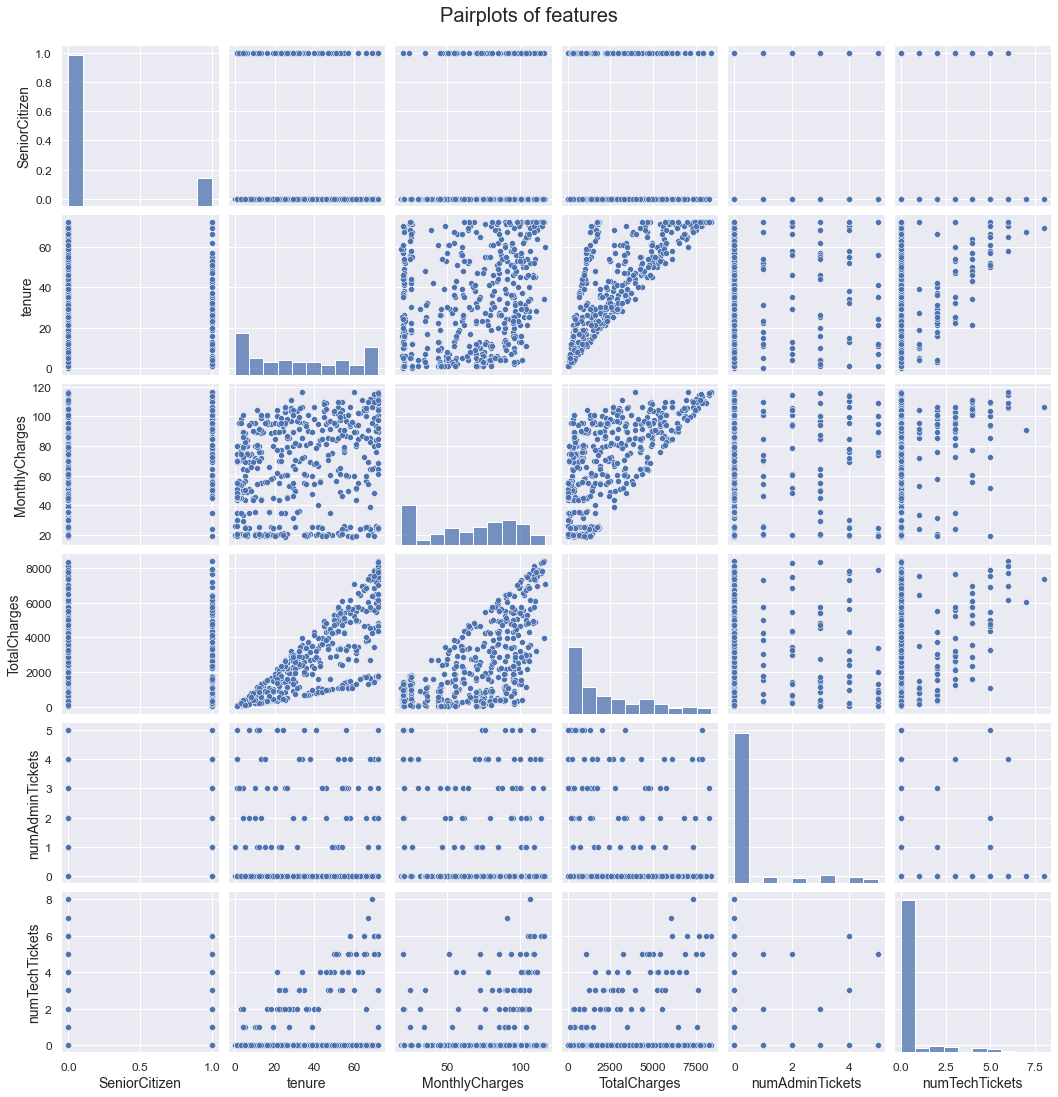

In [23]:
plt.figure(figsize=(20,20))

sns.pairplot(df.sample(500))

plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Correlation

In [24]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
SeniorCitizen,1.00,0.02,0.22,0.10,-0.00,0.09
tenure,0.02,1.00,0.25,0.83,-0.00,0.22
MonthlyCharges,0.22,0.25,1.00,0.65,0.01,0.25
TotalCharges,0.10,0.83,0.65,1.00,0.01,0.28
numAdminTickets,-0.00,-0.00,0.01,0.01,1.00,-0.01
numTechTickets,0.09,0.22,0.25,0.28,-0.01,1.00


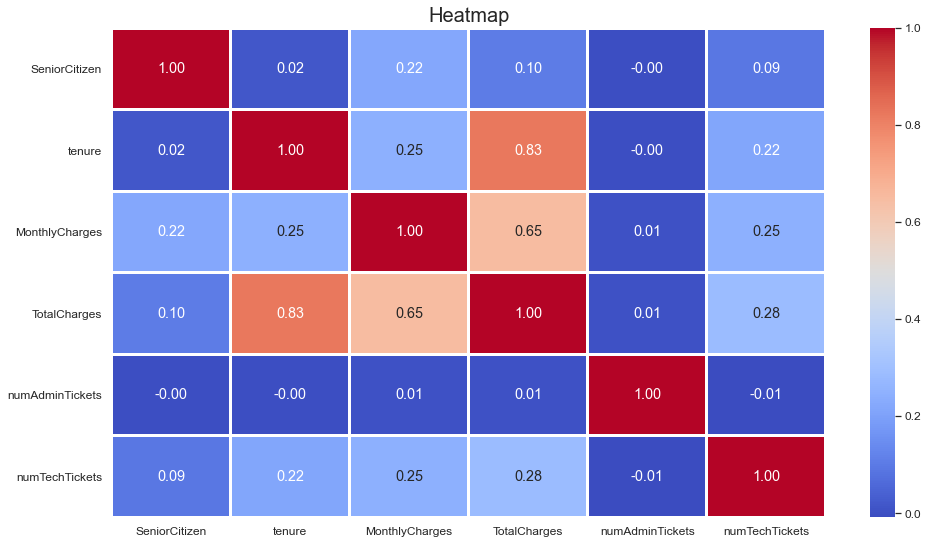

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Heatmap", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### Type Change

In [ ]:
df.info()

In [ ]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [ ]:
df.info()

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [26]:
df.to_csv("churnclean.csv", index=False)

## Regression Analysis

### Linear Regression

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

### Logistic Regression

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

#### Python code done by Dennis Lam